# Task 1

In [1]:
%load_ext autoreload
%autoreload 2

# Use HuggingFace's datasets library to access the financial_phrasebank dataset
from datasets import load_dataset

In [2]:
dataset = load_dataset(
    "financial_phrasebank", 
    'sentences_50agree' # Select variation of the dataset
)

print(f'The dataset is a dictionary with two splits: \n\n{dataset}')

Reusing dataset financial_phrasebank (C:\Users\korn5\.cache\huggingface\datasets\financial_phrasebank\sentences_50agree\1.0.0\a6d468761d4e0c8ae215c77367e1092bead39deb08fbf4bffd7c0a6991febbf0)


  0%|          | 0/1 [00:00<?, ?it/s]

The dataset is a dictionary with two splits: 

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4846
    })
})


In [3]:
from sklearn.model_selection import train_test_split

# Split test data from training data
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    dataset["train"]['sentence'], 
    dataset["train"]['label'], 
    test_size=0.2, 
    stratify=dataset["train"]['label']  # make sure the same proportion of labels is in the test set and training set
)

In [4]:
# label 0 = negative, 1 = neutral, 2 = positive
print(f'How many instances in the train dataset? \n\n{len(train_sentences)}')
print('')
print(f'What does one instance look like? \n\n{train_sentences[234]}')

How many instances in the train dataset? 

3876

What does one instance look like? 

More than 50,000 tonnes of asphalt mix will be used in the contract .


In [5]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences, train_labels, test_size=0.25, stratify=train_labels)

In [6]:
print(f'How many instances in the validation dataset? \n\n{len(val_sentences)}\n')
print(f'How many instances in the test dataset? \n\n{len(test_sentences)}')

How many instances in the validation dataset? 

969

How many instances in the test dataset? 

970


In [7]:
train_sentences[0:3]

["Last week , the Finnish metals and technology group announced plans to sell more than 80 percent of its technology unit to further the company 's strategic goal of becoming the world 's largest stainless steel maker .",
 'Revenue was slightly down , at  x20ac 495 million $ 634 million , compared to  x20ac 497 million a year earlier .',
 '2010 16 July 2010 - Finnish steel maker Rautaruukki Oyj HEL : RTRKS , or Ruukki , said today it turned to a net profit of EUR20m in the second quarter of 2010 from a net loss of EUR94m in the corresponding period last year .']

## BOW feature

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

class Tokenizer(object):
    def __call__(self, sent):
        return word_tokenize(sent)

vectorizer = CountVectorizer(tokenizer=Tokenizer()) 

vectorizer.fit(train_sentences)  # Learn the vocabulary
X_train = vectorizer.transform(train_sentences)  # extract training set bags of words
X_val = vectorizer.transform(val_sentences)

C:\Users\korn5\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Logistic regression model

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, train_labels)

C:\Users\korn5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_val_pred = classifier.predict(X_val)
y_train_pred = classifier.predict(X_train)

In [11]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(val_labels, y_val_pred))
print(f' macro avg f1 score of traning set is {f1_score(y_train_pred,train_labels,average="macro")}')

              precision    recall  f1-score   support

           0       0.74      0.53      0.62       121
           1       0.81      0.89      0.85       576
           2       0.69      0.64      0.66       272

    accuracy                           0.77       969
   macro avg       0.75      0.69      0.71       969
weighted avg       0.77      0.77      0.77       969

 macro avg f1 score of traning set is 0.9953618846096085


In [12]:
import numpy as np
error_indexes = y_val_pred != val_labels  # compare predictions to gold labels

# get the text of tweets where the classifier made an error:
sentences_err = np.array(val_sentences)[error_indexes]

# WRITE YOUR CODE HERE
pred_err = y_val_pred[error_indexes]
gold_err = np.array(val_labels)[error_indexes]

for i in range(2):  # just print the first ten
    print(f'Tweet: {sentences_err[i]}; true label = {gold_err[i]}, prediction = {pred_err[i]}.')

Tweet: Three students from Universiti Sains Malaysia have won a study trip to Helsinki .; true label = 1, prediction = 2.
Tweet: For 24-hour news , try ICIS news www.icis.com Click `` trial '' , then ICIS news; true label = 1, prediction = 2.


### using Bi gram feature

In [13]:
ngram_vectorizer = CountVectorizer(tokenizer=Tokenizer(),ngram_range=(2,2))

In [14]:
ngram_vectorizer.fit(train_sentences)
X_train_ngram = ngram_vectorizer.transform(train_sentences)
X_val_ngram = ngram_vectorizer.transform(val_sentences)

C:\Users\korn5\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [15]:
classifier_ngram = LogisticRegression()
classifier_ngram.fit(X_train_ngram, train_labels)

LogisticRegression()

In [16]:
y_val_pred_ngram = classifier_ngram.predict(X_val_ngram)
y_train_pred_ngram = classifier_ngram.predict(X_train_ngram)
print(classification_report(val_labels, y_val_pred_ngram))
print(f' macro avg f1 score of traning set is  {f1_score(y_train_pred_ngram,train_labels, average= "macro")}')

              precision    recall  f1-score   support

           0       0.88      0.36      0.51       121
           1       0.74      0.97      0.84       576
           2       0.76      0.46      0.57       272

    accuracy                           0.75       969
   macro avg       0.79      0.59      0.64       969
weighted avg       0.76      0.75      0.72       969

 macro avg f1 score of traning set is  1.0


### using Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('omw-1.4')
class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self, sent):
        return [self.wnl.lemmatize(self.wnl.lemmatize(self.wnl.lemmatize(tok, pos='n'), pos='v'), pos='a') for tok in word_tokenize(sent)]
    
lemma_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\korn5\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [21]:
lemma_vectorizer.fit(train_sentences)
X_train_lemma = lemma_vectorizer.transform(train_sentences)
X_val_lemma = lemma_vectorizer.transform(val_sentences)

In [22]:
classifier_lemma = LogisticRegression()
classifier_lemma.fit(X_train_lemma, train_labels)

C:\Users\korn5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_val_pred_lemma = classifier_lemma.predict(X_val_lemma)
y_train_pred_lemma = classifier_lemma.predict(X_train_lemma)
print(classification_report(val_labels, y_val_pred_lemma))
print(f' macro avg f1 score of traning set is {f1_score(y_train_pred_lemma,train_labels,average="macro")}')

              precision    recall  f1-score   support

           0       0.74      0.55      0.63       121
           1       0.80      0.87      0.84       576
           2       0.68      0.63      0.65       272

    accuracy                           0.76       969
   macro avg       0.74      0.69      0.71       969
weighted avg       0.76      0.76      0.76       969

 macro avg f1 score of traning set is 0.9929891382839987


### using both  lemmatization and  bi-gram

In [24]:
lemma_bi_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),ngram_range=(2,2))

In [25]:
lemma_bi_vectorizer.fit(train_sentences)
X_train_lemma_bi = lemma_bi_vectorizer.transform(train_sentences)
X_val_lemma_bi = lemma_bi_vectorizer.transform(val_sentences)

C:\Users\korn5\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
classifier.fit(X_train_lemma_bi, train_labels)
y_val_pred_lemma_bi = classifier.predict(X_val_lemma_bi)
y_train_pred_lemma_bi = classifier.predict(X_train_lemma_bi)
print(classification_report(val_labels, y_val_pred_lemma_bi))
print(f' macro avg f1 score of traning set is {f1_score(y_train_pred_lemma_bi,train_labels,average="macro")}')

              precision    recall  f1-score   support

           0       0.86      0.36      0.50       121
           1       0.74      0.96      0.84       576
           2       0.75      0.47      0.58       272

    accuracy                           0.75       969
   macro avg       0.78      0.60      0.64       969
weighted avg       0.76      0.75      0.72       969

 macro avg f1 score of traning set is 1.0


## Test using Lemmatization and uni-gram feature

In [27]:
X_test_lemma = lemma_vectorizer.transform(test_sentences)
y_test_pred = classifier_lemma.predict(X_test_lemma)
print(classification_report(test_labels, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68       121
           1       0.80      0.89      0.84       576
           2       0.71      0.63      0.67       273

    accuracy                           0.78       970
   macro avg       0.77      0.70      0.73       970
weighted avg       0.77      0.78      0.77       970



In [28]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\korn5\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


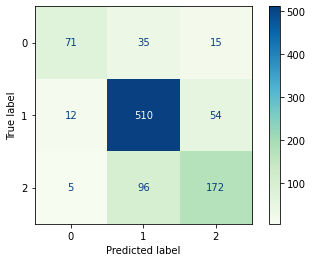

In [29]:
plot_confusion_matrix(classifier_lemma, X_test_lemma, test_labels,cmap = 'GnBu')  

# Task2

In [30]:
import re
import numpy as np

def read_sec_filings(split):
    # Use this function to load the SEC filings data from text files
    
    if split == 'train':
        with open('C:/Users/korn5/OneDrive - University of Bristol/Data Sci/TB2/INDA/coursework/SEC-filings/SEC-filings/train/FIN5.txt',
                  encoding='utf-8') as fp:
            lines = fp.readlines()
    else:
        with open('C:/Users/korn5/OneDrive - University of Bristol/Data Sci/TB2/INDA/coursework/SEC-filings/SEC-filings/test/FIN3.txt',
                  encoding='utf-8') as fp:
            lines = fp.readlines()
   
    # store the tokens and labels for all sentences
    sentences = []
    labels = []

    # the tokens and labels for the current sentence
    current_sen = []
    current_labels = []

    for i in range(2, len(lines)):
        # print(f'This is line {i}')
        # print(lines[i])

        if len(lines[i]) > 1:  # Line with some data on: The data consists of tokens and tags.
            data = re.split(' ', lines[i])  # tokenise the line
            # print(data)
            current_sen.append(data[0])  # append the token 
            
            # data[1] contains POS tags -- you can also use these in your model.
            
            current_labels.append(data[3].strip())  # append the NER tag
        elif len(current_sen) > 1:  # this marks the end of a sentence
            # end of sentence
            sentences.append(current_sen)  # save the tokens for this sentence
            current_sen = []  # reset

            labels.append(current_labels)  # save the tags for this sentence
            current_labels = []

    if len(current_sen) > 1:  # save the last sentence
        sentences.append(current_sen)
        labels.append(current_labels)
    
    print(f'Number of sentences loaded = {len(sentences)}')
    print(f'Number of unique labels: {np.unique(np.concatenate(labels))}')
                                      
    return sentences, labels

In [31]:
from sklearn.model_selection import train_test_split

print('Loading the original training set: ')
sentences_ner, labels_ner = read_sec_filings('train')

print('\nLoading the test set: ')
test_sentences_ner, test_labels_ner = read_sec_filings('test')

Loading the original training set: 
Number of sentences loaded = 1152
Number of unique labels: ['I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']

Loading the test set: 
Number of sentences loaded = 303
Number of unique labels: ['I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']


In [32]:
train_sentences_ner, val_sentences_ner, train_labels_ner, val_labels_ner = train_test_split(
    sentences_ner, 
    labels_ner, 
    test_size=0.2,
    # stratify=labels_ner  # there are too few examples of some classes to stratify
)

print(f'Number of training sentences = {len(train_sentences_ner)}')
print(f'Number of validation sentences = {len(val_sentences_ner)}')

Number of training sentences = 921
Number of validation sentences = 231


### data processing

In [33]:
train_set = [list(zip([tok for tok in train_sentences_ner[i]], [label for label in train_labels_ner[i]])) for i in range (len(train_sentences_ner))][:-1]
val_set = [list(zip([tok for tok in val_sentences_ner[i]], [label for label in val_labels_ner[i]])) for i in range (len(val_sentences_ner))][:-1]
test_set = [list(zip([tok for tok in test_sentences_ner[i]], [label for label in test_labels_ner[i]])) for i in range (len(test_sentences_ner))][:-1]

### CRF without feature

In [34]:
import nltk

# Train a CRF NER tagger
def train_CRF_NER_tagger(train_set):
    tagger = nltk.tag.CRFTagger()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger 

tagger = train_CRF_NER_tagger(train_set)

In [35]:
predicted_tags = tagger.tag_sents(val_sentences_ner)

In [36]:
def extract_spans(tagged_sents):
    """
    Extract a list of tagged spans for each named entity type, 
    where each span is represented by a tuple containing the 
    start token and end token indexes.
    
    returns: a dictionary containing a list of spans for each entity type.
    """
    spans = {}
        
    for sidx, sent in enumerate(tagged_sents):
        start = -1
        entity_type = None
        for i, (tok, lab) in enumerate(sent):
            if 'I-' in lab and start == -1:
                start = i
                end = i + 1
                entity_type = lab[2:]
                
            elif 'I-' in lab and start >= 0:
                if lab == sent[i-1][1]:
                    end = i+1
                else:
                    start = i
                    end = i+1 
                    entity_type = lab[2:]
                
            elif lab == 'O' and start >= 0:
                if entity_type not in spans:
                    spans[entity_type] = []
                
                spans[entity_type].append((start, end, sidx))
                start = -1
                
    return spans


def cal_span_level_f1(test_sents, test_sents_with_pred):
    # get a list of spans from the test set labels
    gold_spans = extract_spans(test_sents)
    
    # get a list of spans predicted by our tagger
    pred_spans = extract_spans(test_sents_with_pred)
    pred_type = pred_spans.keys()
    
    # compute the metrics for each class:
    f1_per_class = []
    
    ne_types = gold_spans.keys()  # get the list of named entity types (not the tags)
    
    for ne_type in ne_types:
        # compute the confusion matrix
        true_pos = 0
        false_pos = 0
        
        if ne_type not in pred_type:
            false_pos += 1
        else:
            for span in pred_spans[ne_type]:
                if span in gold_spans[ne_type]:
                    true_pos += 1
                else:
                    false_pos += 1
                
        false_neg = 0
        if ne_type not in pred_type:
            false_neg += 0
        else:
            for span in gold_spans[ne_type]:
                if span not in pred_spans[ne_type]:
                    false_neg += 1
                
        if true_pos + false_pos == 0:
            precision = 0
        else:
            precision = true_pos / float(true_pos + false_pos)
            
        if true_pos + false_neg == 0:
            recall = 0
        else:
            recall = true_pos / float(true_pos + false_neg)
        
        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * precision * recall / (precision + recall)
            
        f1_per_class.append(f1)
        
        
        print(f'F1 score for class {ne_type} = {f1}')
        
    print(f'Macro-average f1 score = {np.mean(f1_per_class)}')
    
cal_span_level_f1(val_set, predicted_tags)

F1 score for class PER = 0.9652777777777778
F1 score for class LOC = 0.64
F1 score for class MISC = 0
F1 score for class ORG = 0.8958333333333334
Macro-average f1 score = 0.6252777777777778


### add feature for CRF model

In [37]:
import re, unicodedata

class CustomCRFTagger(nltk.tag.CRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, idx):
            """
            Extract basic features about this word including
                - Current word
                - is it capitalized?
                - Does it have punctuation?
                - Does it have a number?
                - Suffixes up to length 3

            Note that : we might include feature over previous word, next word etc.

            :return: a list which contains the features
            :rtype: list(str)
            """
            token = tokens[idx]

            feature_list = []

            if not token:
                return feature_list

            # Capitalization
            if token[0].isupper():
                feature_list.append("CAPITALIZATION")

            # Number
            if re.search(self._pattern, token) is not None:
                feature_list.append("HAS_NUM")

            # Punctuation
            punc_cat = {"Pc", "Pd", "Ps", "Pe", "Pi", "Pf", "Po"}
            if all(unicodedata.category(x) in punc_cat for x in token):
                feature_list.append("PUNCTUATION")

            # Suffix up to length 3
            if len(token) > 1:
                feature_list.append("SUF_" + token[-1:])
            if len(token) > 2:
                feature_list.append("SUF_" + token[-2:])
            if len(token) > 3:
                feature_list.append("SUF_" + token[-3:])

                
            # Current word
            feature_list.append("WORD_" + token)
            
            
            if idx > 0:
                feature_list.append("PREVWORD_" + tokens[idx-1])
            if idx < len(tokens)-1:
                feature_list.append("NEXTWORD_" + tokens[idx+1])
                
#             print(feature_list)  
#             print(token)

            return feature_list

In [38]:
# *** Improve the CRF NER tagger using parts of speech
class CRFTaggerWithPOS(CustomCRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, index):
        """
        Extract the features for a token and append the POS tag as an additional feature.
        """
        basic_features = super()._get_features(tokens, index)
        
        # Get the pos tags for the current sentence and save it
        if tokens != self._current_tokens:
            self._pos_tagged_tokens = nltk.pos_tag(tokens)
            self._current_tokens = tokens
            
        basic_features.append(self._pos_tagged_tokens[index][1])
#         print(basic_features)
        
        return basic_features

In [39]:
def train_CRF_NER_tagger_with_POS(train_set):
    tagger = CRFTaggerWithPOS()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger_with_POS = train_CRF_NER_tagger_with_POS(train_set)

In [40]:
predicted_tags = tagger_with_POS.tag_sents(val_sentences_ner)
cal_span_level_f1(val_set, predicted_tags)

F1 score for class PER = 0.9757785467128028
F1 score for class LOC = 0.7857142857142856
F1 score for class MISC = 0
F1 score for class ORG = 0.8775510204081634
Macro-average f1 score = 0.659760963208813


### Use CRF with POS tagging model with testset

In [41]:
predicted_tags_test = tagger_with_POS.tag_sents(test_sentences_ner)
cal_span_level_f1(test_set, predicted_tags_test)

F1 score for class ORG = 0.34408602150537637
F1 score for class PER = 0.8930232558139536
F1 score for class LOC = 0.37499999999999994
F1 score for class MISC = 0
Macro-average f1 score = 0.4030273193298325


## 2.4  Apply your trained NER tagger to the Financial Phrasebank dataset. 

In [42]:
tokenized_sents = []

labs = dataset["train"]['label']
sents = dataset["train"]['sentence']
for sent in dataset["train"]['sentence']:
    tokens = nltk.word_tokenize(sent) 
    tokenized_sents.append(tokens)

In [43]:
#apply model with the data set
predicted_data = tagger.tag_sents(tokenized_sents)

In [44]:
# extract entities
span = extract_spans(predicted_data)
org = span['ORG']
entities = []
sentiment = []
for i in org:
    word =  [i for i, j in predicted_data[i[2]][i[0]:i[1]]]
    lab = labs[i[2]]
    entities.append(' '.join(word))
    sentiment.append(lab)

In [45]:
unique = np.unique(entities)
pos_score = np.zeros(len(unique))
neg_score = np.zeros(len(unique))
for i, entity in enumerate(entities):
    for j, u in enumerate(unique):
        if (entity == u) and (sentiment[i] == 2):
            pos_score[j] += 1
        elif (entity == u) and (sentiment[i] == 0):
            neg_score[j] += 1

In [46]:
#the most 5 positive word
pos_idx = np.argsort((pos_score - neg_score))[-5:]
for idx in pos_idx:
    print(f' ORG: {unique[idx]}, sentiment score: {(pos_score - neg_score)[idx]}')

 ORG: Kaupthing Bank, sentiment score: 2.0
 ORG: Kai, sentiment score: 2.0
 ORG: Finnish Ahlstrom Corporation, sentiment score: 2.0
 ORG: Stonesoft Oyj, sentiment score: 2.0
 ORG: HELSINKI AFX, sentiment score: 3.0


In [47]:
#the most 5 negative word
neg_idx = np.argsort((pos_score - neg_score))[:5]
for idx in neg_idx:
    print(f' ORG: {unique[idx]}, sentiment score: {(pos_score - neg_score)[idx]}')

 ORG: The OMX Helsinki, sentiment score: -2.0
 ORG: Swedbank, sentiment score: -2.0
 ORG: Bank, sentiment score: -2.0
 ORG: Orion Corporation OMX Helsinki, sentiment score: -1.0
 ORG: EMSA, sentiment score: -1.0
